In [2]:
## The dataset used in this project is one of three available, and specifically, we used the balanced dataset. 
## This dataset comprises 50% of observations with diabetes or pre-diabetes and the remaining 50% without.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import lazypredict
from lazypredict.Supervised import LazyClassifier
from lazypredict.Supervised import CLASSIFIERS
from sklearn.metrics import accuracy_score

In [3]:
diabetes = pd.read_csv(r'C:\Users\Lucas\Desktop\projeto 2\diabetes_binary_health_indicators_BRFSS2015.csv', sep = ',')
print('Shape', diabetes.shape)

Shape (253680, 22)


In [4]:
#The dataset is already clean
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
diabetes['Diabetes_binary'] = diabetes['Diabetes_binary'].astype(int)

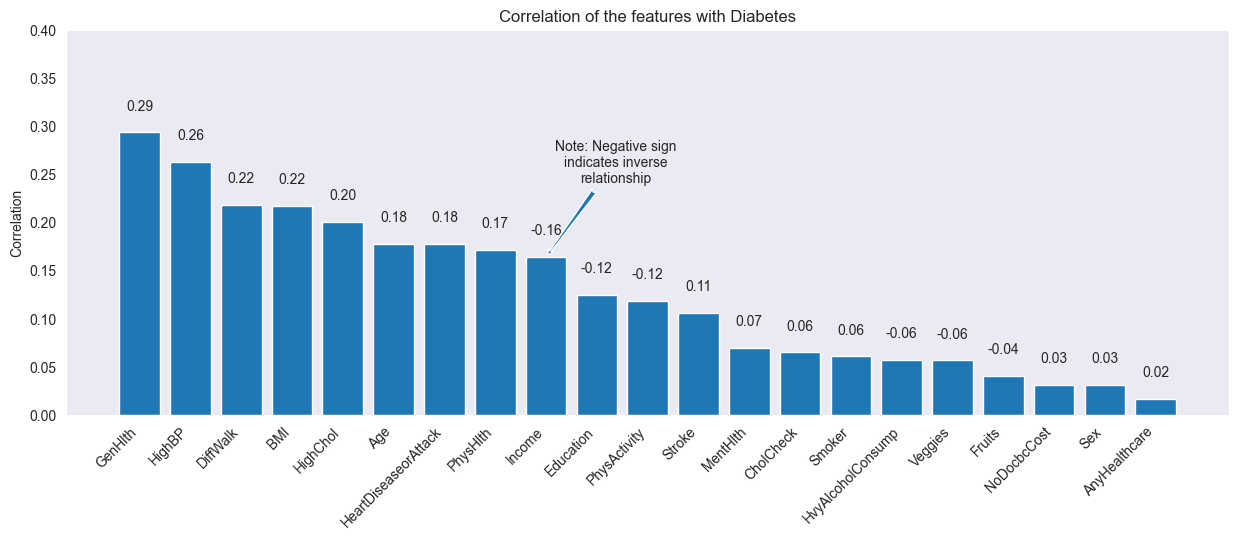

In [5]:
#Let's check the correlation between the variables and the target

# Calculate the correlation coefficients
corr_values = diabetes.corr()['Diabetes_binary'].drop('Diabetes_binary')
abs_corr_values = abs(corr_values)
labels = corr_values.index

# Sorting the correlation coefficients by absolute value in descending order
sort_index = np.argsort(abs_corr_values)[::-1]
labels = labels[sort_index]
abs_corr_values = abs_corr_values[sort_index]
corr_values = corr_values[sort_index]

sns.set_style('dark')

# Create the bar plot
fig, ax = plt.subplots(figsize=(15, 5))
bars = ax.bar(labels, abs_corr_values)
for i, bar in enumerate(bars):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f"{corr_values[i]:.2f}", ha='center', va='bottom')
    if i == 8 and corr_values[i] < 0:
        ax.annotate('Note: Negative sign\nindicates inverse\nrelationship',
                    xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    xytext=(50, 85), textcoords='offset points',
                    ha='center', va='top', arrowprops=dict(arrowstyle='fancy'))
        
ax.set_title('Correlation of the features with Diabetes')
ax.set_ylabel('Correlation')
ax.set_ylim([0, 0.4])
ax.set_xticklabels(labels = labels, rotation=45, ha='right')
plt.show()


According to the graph, the variables with the highest correlation with diabetes are GenHlth and HighBP. GenHlth refers to each respondent's self-rated health (excellent, good, poor). And highbp refers to having high blood pressure or not

_______________________________________________________

- Machine Learning

In [6]:
x = diabetes.drop('Diabetes_binary', axis = 1)
y = diabetes['Diabetes_binary']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [7]:
#Sampling for speed testing purposes
train_size = int(0.1 * len(x_train))
x_train_sample, y_train_sample = x_train[:train_size], y_train[:train_size]

In [8]:
#Wanted classifiers, just as a reminder
#classifiers = ['LinearDiscriminantAnalysis', 'AdaBoostClassifier', 'XGBClassifier', 'LGBMClassifier', 'LogisticRegression', 
#'RandomForestClassifier', 'ExtraTreesClassifier', 'LinearSVC', 'CalibratedClassifierCV', 'RidgeClassifierCV', 'DummyClassifier']

In [9]:
#Printing the classifiers indices in CLASSIFIERS
#for x , i in zip(CLASSIFIERS, range(len(CLASSIFIERS))):
#    print('{0} {1}'.format(i, x))

In [10]:
#The selected models were based on their performance and execution speed, after testing them with the samples.
desired_classes = [13, 0, 27, 28, 15, 21, 8, 14, 3, 23, 6]

In [11]:
lazypredict.Supervised.CLASSIFIERS = [CLASSIFIERS[p] for p in list(desired_classes)]

In [12]:
clf = LazyClassifier(verbose = 0, ignore_warnings = True, custom_metric = None, predictions = False, random_state = 10)
models = clf.fit(x_train, x_test, y_train, y_test)
models

100%|██████████| 11/11 [04:14<00:00, 23.16s/it]


(                            Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
 Model                                                                        
 LinearDiscriminantAnalysis      0.86               0.58     0.58      0.83   
 AdaBoostClassifier              0.87               0.58     0.58      0.84   
 RandomForestClassifier          0.86               0.57     0.57      0.83   
 XGBClassifier                   0.86               0.57     0.57      0.83   
 ExtraTreesClassifier            0.85               0.57     0.57      0.82   
 CalibratedClassifierCV          0.86               0.57     0.57      0.83   
 LogisticRegression              0.86               0.56     0.56      0.83   
 LGBMClassifier                  0.87               0.56     0.56      0.83   
 LinearSVC                       0.86               0.53     0.53      0.81   
 RidgeClassifierCV               0.86               0.52     0.52      0.81   
 DummyClassifier                 0.86               

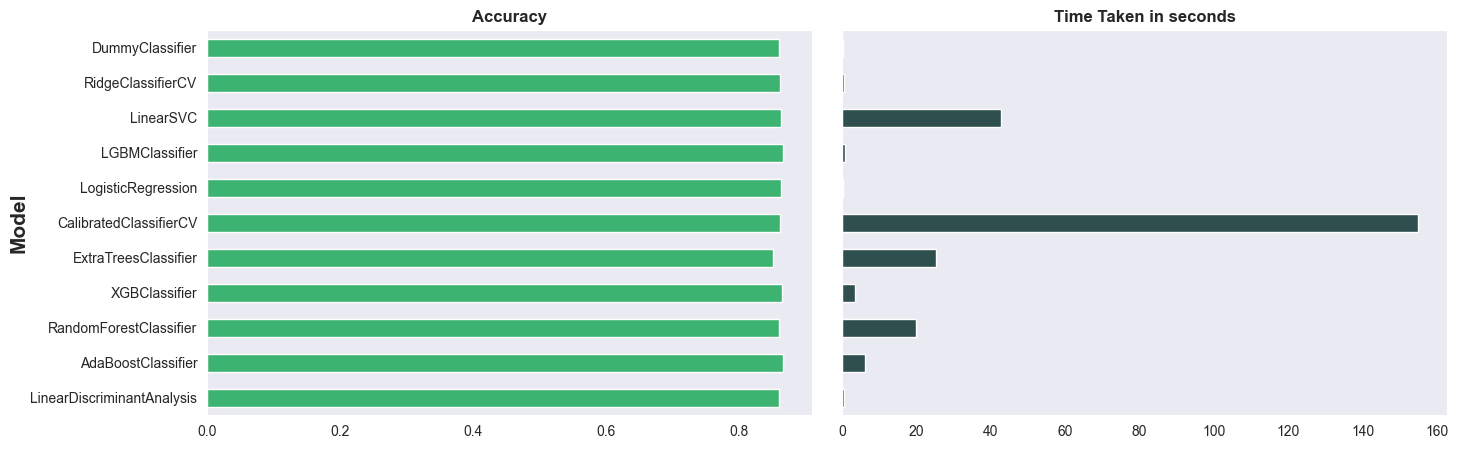

In [13]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(16,5))
models[1].Accuracy.plot(ax = axes[0], kind = 'barh', color = 'Mediumseagreen')
axes[0].set_ylabel('Model', labelpad=1, rotation=90, ha='center', fontsize=15, fontweight = 'bold')
axes[0].set_title('Accuracy', fontweight='bold')
models[1]['Time Taken'].plot(ax = axes[1], kind = 'barh', color = 'darkslategrey')
axes[1].set_title('Time Taken in seconds', fontweight='bold')
axes[1].set_ylabel('')
axes[1].set_yticklabels('')
plt.subplots_adjust(wspace=0.05)
plt.show()

In [14]:
#Normalizing the features does not improved performance.

#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#diabetes_norm = scaler.fit_transform(diabetes)
#x_norm = diabetes.drop('Diabetes_binary', axis = 1)
#y_norm = diabetes['Diabetes_binary']
#x_norm_train, x_norm_test, y_norm_train, y_norm_test = train_test_split(x_norm, y_norm, test_size=0.20, random_state=1)
#clf_norm = LazyClassifier(verbose = 0, ignore_warnings = True, custom_metric = None, predictions = False, random_state = 10)
#models_normalized = clf_norm.fit(x_norm_train, x_norm_test, y_norm_train, y_norm_test)
#models_normalized

I decided to use AdaBoostClassifier, XGBClassifier, and LGBMClassifier based on the outcomes. They are three boosting classifiers and my plan is to enhance the results by adjusting their parameters.

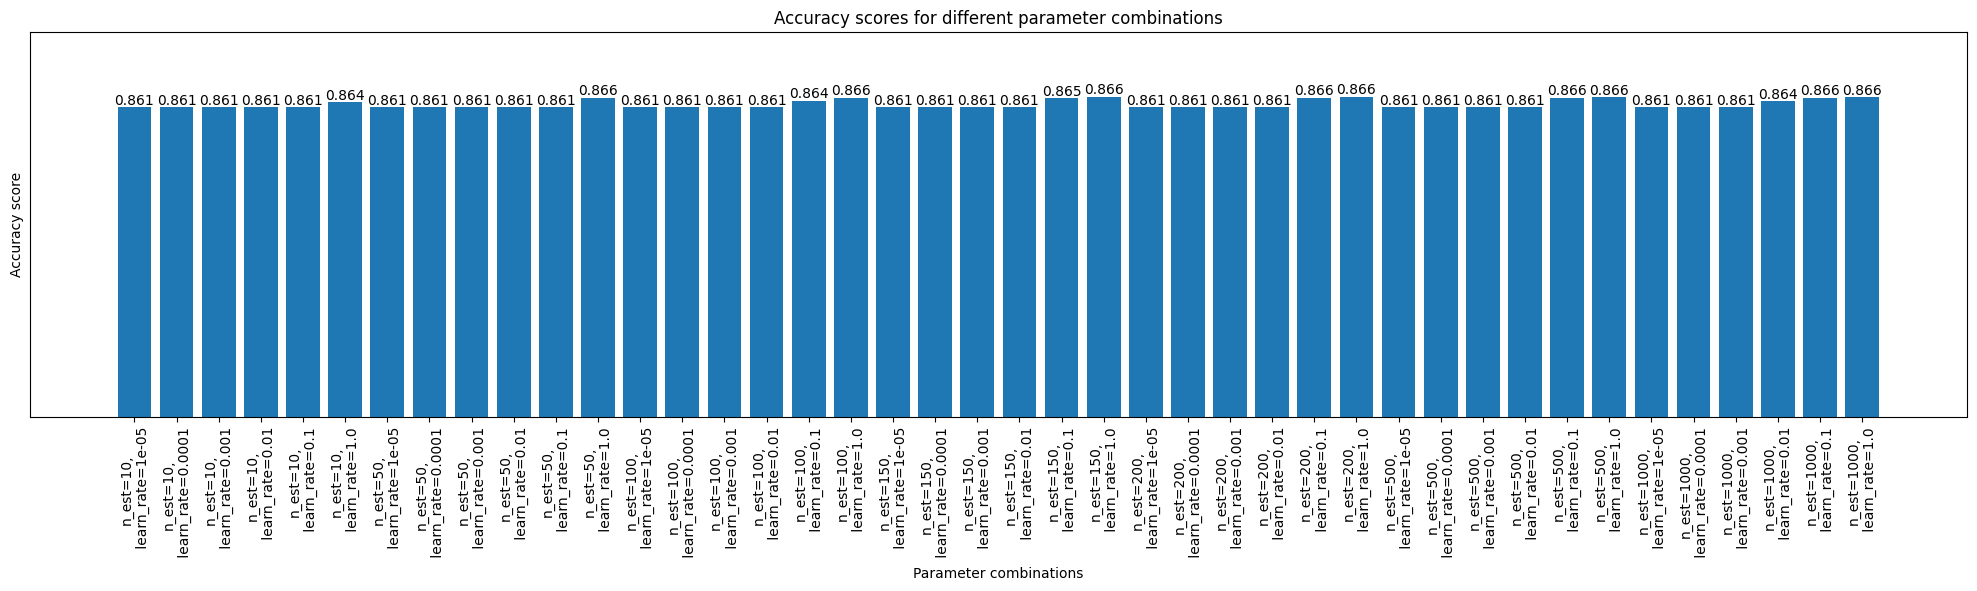

In [8]:
##AdaBoostClassifier

#Evaluating the classifier accuracy with test samples
from sklearn.ensemble import AdaBoostClassifier
n_estimators_list = [10, 50, 100, 150, 200, 500, 1000]
learning_rate_list = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0]
scores = []
parameter_labels = []
for n_estimators in n_estimators_list:
    for learning_rate in learning_rate_list:
        ada = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate)
        ada.fit(x_train, y_train)
        accuracy = ada.score(x_test, y_test)
        scores.append(accuracy)
        parameter_labels.append(f'n_est={n_estimators},\n learn_rate={learning_rate}')
        
# Create a bar plot to compare the different parameter values
x_pos = np.arange(len(parameter_labels))
plt.figure(figsize=(25,5))
plt.bar(x_pos, scores)
plt.xticks(x_pos, parameter_labels, rotation=90)
plt.xlabel('Parameter combinations')
plt.ylabel('Accuracy score')
plt.tick_params(axis='y', which='both', left=False, labelleft=False)
plt.title('Accuracy scores for different parameter combinations')
plt.ylim(0.7, 0.9)
for i, score in enumerate(scores):
    plt.text(x_pos[i], score, f'{score:.3f}', ha='center', va='bottom')
plt.show()

Adaboostclassifier did not show any performance improvement with parameter variations. I also tested other base_estimators, such as logistic regression, and there were no improvements.
Accuracy remained around 0.86-0.87.

In [16]:
##XGBClassifier

#We will conduct experiments using various parameters in order to enhance the accuracy, using GridSearchCV. Let's attempt to modify multiple parameters, including: 
#max_depth, min_child_weight, gamma, subsample, colsample_bytree, and learning_rate
#If the modification of parameters results in improved outcomes, we will revise the default model accordingly.
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
param_test1 = {
    'max_depth':range(3,10,2), 
    'min_child_weight':range(1,8,2)
    }
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=5, 
                                                  min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
                                                  param_grid = param_test1, scoring='accuracy',n_jobs=4, cv=5)
gsearch1.fit(x_train, y_train)
print(gsearch1.best_params_ , 'Best score:', gsearch1.best_score_)

{'max_depth': 3, 'min_child_weight': 7} Best score: 0.8668992431765987


In [17]:
#As we began with a max_depth of 3 and only tested odd numbers, let's try testing with one unit above and below. The same can be done for the min_child_weight parameter.
param_test2 = {
    'max_depth':[2,3,4], 
    'min_child_weight':[6,7,8]
    }
gsearch2 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=5, 
                                                  min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
                                                  param_grid = param_test2, scoring='accuracy',n_jobs=4, cv=5)
gsearch2.fit(x_train, y_train)
print(gsearch2.best_params_ , 'Best score:', gsearch2.best_score_)

{'max_depth': 2, 'min_child_weight': 6} Best score: 0.8668992480326579


In [18]:
#Testing other non used numbers for min_child_weight
param_test2b = {
    'min_child_weight':[6,8,9,10]
    }
gsearch2b = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=2, 
                                                  min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
                                                  param_grid = param_test2b, scoring='accuracy',n_jobs=4, cv=5)
gsearch2b.fit(x_train, y_train)
print(gsearch2b.best_params_ , 'Best score:', gsearch2b.best_score_)

{'min_child_weight': 6} Best score: 0.8668992480326579


In [20]:
#Testing values ​​for the gamma parameter
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
 }
gsearch3 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=2, 
                                                  min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
                                                  param_grid = param_test3, scoring='accuracy',n_jobs=4, cv=5)
gsearch3.fit(x_train, y_train)
print(gsearch3.best_params_ , 'Best score:', gsearch3.best_score_)

{'gamma': 0.0} Best score: 0.8668992480326579


In [21]:
#Testing values ​​for subsample and colsample_bytree
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=2,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='accuracy',n_jobs=4, cv=5)
gsearch4.fit(x_train, y_train)
print(gsearch4.best_params_ , 'Best score:', gsearch4.best_score_)

{'colsample_bytree': 0.9, 'subsample': 0.8} Best score: 0.8669435958730324


In [22]:
#Lastly, testing values for learning rate
param_test5 = {
 'learning_rate':[0.0001, 0.001, 0.01, 0.1]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=2,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.9,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='accuracy',n_jobs=4, cv=5)
gsearch5.fit(x_train, y_train)
print(gsearch5.best_params_ , 'Best score:', gsearch5.best_score_)

{'learning_rate': 0.1} Best score: 0.8669435958730324


In [12]:
xgb_clf = XGBClassifier(learning_rate = 0.1, 
                        n_estimators = 1000,
                        max_depth = 2,
                        min_child_weight = 6,
                        gamma = 0,
                        subsample = 0.8,
                        colsample_bytree = 0.9,
                        objective = 'binary:logistic',
                        nthread = 4,
                        scale_pos_weight = 1,
                        seed = 27)
xgb_clf.fit(x_train, y_train)
y_pred = xgb_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.866662724692526

Despite multiple attempts at feature engineering to improve the accuracy, it remained at approximately 0.86.

In [13]:
##LightGBMClassifier

#Accuracy with the standard model
import lightgbm as lgb
from lightgbm import LGBMClassifier
lgb_clf = LGBMClassifier(application = 'binary')
lgb_clf.fit(x_train, y_train)
lgb_y_pred = lgb_clf.predict(x_test)
lgb_accuracy = accuracy_score(lgb_y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(lgb_accuracy))

LightGBM Model accuracy score: 0.8661


In [65]:
#Testing different parameters
num_leaves_list = [8, 16, 32, 64, 128, 256]
max_depth_list = [3, 4, 5, 6, 7, 8]
num_iterations_list = [50, 150, 500, 1000]
max_bin_list = [128, 255, 512, 1024]
lgb_scores = {}
for num_leaves in num_leaves_list:
    for max_depth in max_depth_list:
        for iteration in num_iterations_list:
            for bin_max in max_bin_list:
                lgb_clf = LGBMClassifier(application = 'binary', num_leaves = num_leaves, max_depth = max_depth, num_iterations = iteration, max_bin = bin_max, learning_rate = 0.1)
                lgb_clf.fit(x_train, y_train)
                lgb_y_pred = lgb_clf.predict(x_test)
                lgb_accuracy = accuracy_score(lgb_y_pred, y_test)
                lgb_scores[f'num_l = {num_leaves}, max_dep = {max_depth}, iterations = {iteration}, max_bin = {bin_max}'] = lgb_accuracy
print(max(lgb_scores, key = lgb_scores.get),'-', 'Accuracy:', lgb_scores[max(lgb_scores, key = lgb_scores.get)])

num_l = 16, max_dep = 4, iterations = 150, max_bin = 128 - Accuracy: 0.8668401135288553


In [14]:
#Trying the parameters with gridsearchcv to get an estimate of the model's performance on new, unseen data, and to help prevent overfitting.
from sklearn.model_selection import GridSearchCV
lgb_param_test = {
    'num_leaves':[8, 16, 32, 64, 128, 256],
    'max_depth':[3, 4, 5, 6, 7, 8],
    'num_iterations':[50, 150, 500, 1000],
    'max_bin':[128, 255, 512, 1024]
    }
gsearchlgb = GridSearchCV(estimator = LGBMClassifier(application = 'binary', learning_rate = 0.1), 
                          param_grid = lgb_param_test, scoring='accuracy', n_jobs=4, cv=5)
gsearchlgb.fit(x_train, y_train)
print(gsearchlgb.best_params_ , 'Best score:', gsearchlgb.best_score_)

{'max_bin': 128, 'max_depth': 4, 'num_iterations': 150, 'num_leaves': 16} Best score: 0.8671259086078514


By using GridSearchCV, we observed a slight improvement in accuracy, although it was not significantly different from the results obtained with the other models.

__________________________________________________________________________________________________________________________________________________

- Upon evaluating the top-performing models recommended by the `lazyclassifier`, we opted to employ the three boosting classifiers that ranked highly. However, despite applying feature engineering, the results from the three boosting classifiers were quite similar.


This project provided valuable insights into boosting classifiers, including their parameters, construction, and overall purpose.
It was noticeable that among the 3, `lightgbm` was the most accurate and fastest. 
While LightGBM is a more recent and computationally efficient boosting algorithm, it is not necessarily superior or more precise than AdaBoost or XGBoost. The decision to use a particular boosting algorithm depends on the unique machine learning problem being addressed and the available computational resources.